In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df_1 = pd.read_csv('Social_Network_Ads_1.csv')

In [3]:
df_1.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
167,15614827,Female,35,71000,0
305,15787550,Male,42,54000,0
110,15665416,Female,39,71000,0
395,15691863,Female,46,41000,1
201,15708196,Male,49,74000,0


In [4]:
df_1 = df_1.iloc[:,2:]

In [5]:
df_1

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Train test split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(df_1.drop('Purchased',axis = 1),
                                                 df_1['Purchased'],
                                                 test_size=0.2,
                                                 random_state=2)
X_train.shape,X_test.shape

((320, 2), (80, 2))

In [8]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.7787500e+01, 6.9359375e+04])

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [11]:
X_train_scaled

,Age,EstimatedSalary
0,0.889288,-0.659246
1,-0.172548,0.873927
2,-1.041324,-0.364405
3,0.985819,0.608570
4,-0.944793,0.579086
...,...,...
315,0.792758,1.404640
316,0.985819,-0.836150
317,-1.717038,-1.366863
318,-0.848263,0.313729


In [12]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.8,69359.4
std,10.4,33969.7
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,69500.0
75%,46.0,87000.0
max,60.0,150000.0


In [13]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


# Effect of Scaling

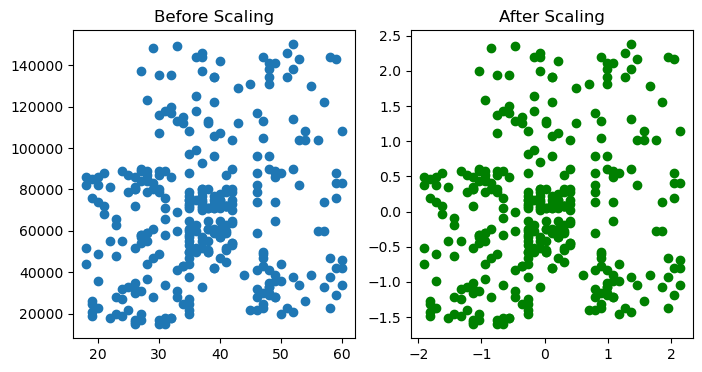

In [15]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(8,4))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='green')
ax2.set_title('After Scaling')

plt.show()

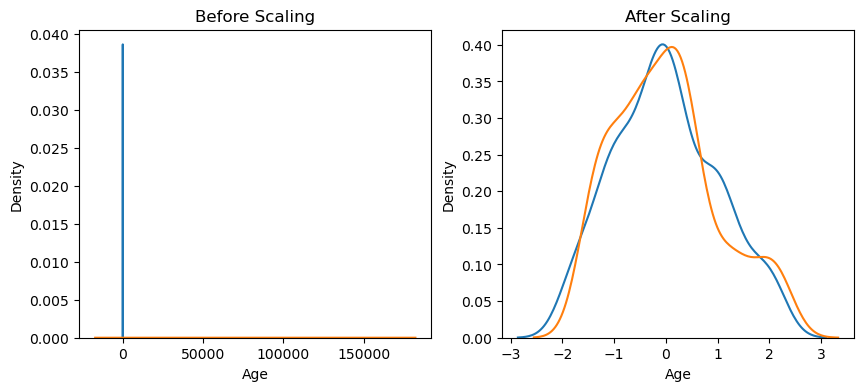

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(10,4))

sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)
ax1.set_title('Before Scaling')

sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
ax2.set_title('After Scaling')

plt.show()